In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('Train_gQ1XM0h.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
ID                             9527 non-null object
Office_PIN                     9527 non-null int64
Application_Receipt_Date       9527 non-null object
Applicant_City_PIN             9430 non-null float64
Applicant_Gender               9460 non-null object
Applicant_BirthDate            9454 non-null object
Applicant_Marital_Status       9454 non-null object
Applicant_Occupation           8306 non-null object
Applicant_Qualification        9441 non-null object
Manager_DOJ                    8844 non-null object
Manager_Joining_Designation    8844 non-null object
Manager_Current_Designation    8844 non-null object
Manager_Grade                  8844 non-null float64
Manager_Status                 8844 non-null object
Manager_Gender                 8844 non-null object
Manager_DoB                    8844 non-null object
Manager_Num_Application        8844 non-null float64
Manager

In [94]:
df.shape

(9527, 23)

In [5]:
pd.set_option('display.max_columns',None)
df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [6]:
def missing_value(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys = ['Total', 'Percent'])
    return missing_data

missing_value(df)

,Total,Percent
Applicant_Occupation,1221,0.128162
Manager_Current_Designation,683,0.071691
Manager_Gender,683,0.071691
Manager_DOJ,683,0.071691
Manager_Joining_Designation,683,0.071691
Manager_Num_Products2,683,0.071691
Manager_Status,683,0.071691
Manager_Grade,683,0.071691
Manager_DoB,683,0.071691
Manager_Num_Application,683,0.071691


In [7]:
#df['Applicant_Occupation'] = df['Applicant_Occupation'].astype('category')
#sns.countplot(df['Applicant_Occupation'])

In [95]:
def drop(df,columns):
    for col in columns:
        del df[col]
    return df
df = drop(df,['ID','Office_PIN','Applicant_City_PIN'])

In [96]:
df.drop(index=df[df['Manager_DOJ'].isnull()].index, inplace= True)

(8844, 20)
Application_Receipt_Date          0
Applicant_Gender                 53
Applicant_BirthDate              59
Applicant_Marital_Status         59
Applicant_Occupation           1090
Applicant_Qualification          71
Manager_DOJ                       0
Manager_Joining_Designation       0
Manager_Current_Designation       0
Manager_Grade                     0
Manager_Status                    0
Manager_Gender                    0
Manager_DoB                       0
Manager_Num_Application           0
Manager_Num_Coded                 0
Manager_Business                  0
Manager_Num_Products              0
Manager_Business2                 0
Manager_Num_Products2             0
Business_Sourced                  0
dtype: int64


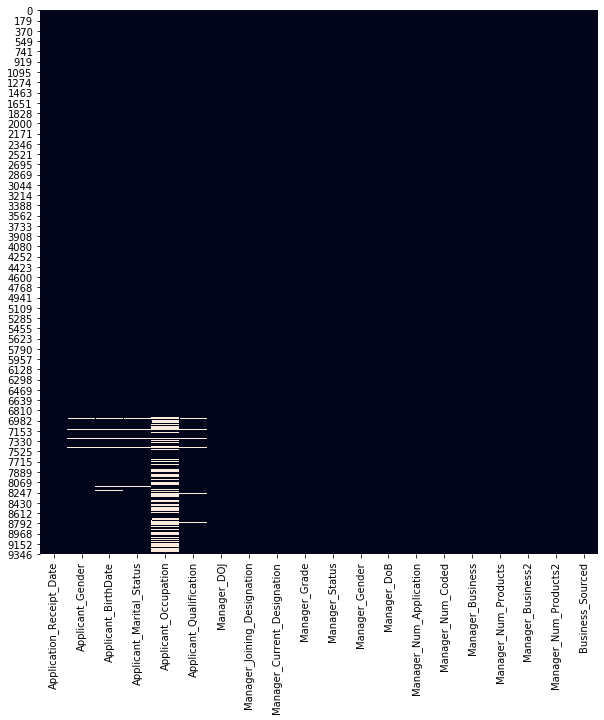

In [97]:
plt.figure(figsize= [10,10])
sns.heatmap(df.isnull(), cbar=False)
print(df.shape)
print(df.isnull().sum())

In [11]:
df.head()

,Application_Receipt_Date,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,4/16/2007,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,4/16/2007,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,4/16/2007,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,4/16/2007,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,4/16/2007,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [98]:
df['Applicant_BirthDate'].fillna(method='ffill', inplace = True)
df['Applicant_Gender'].fillna(method='ffill', inplace = True)
df['Applicant_Marital_Status'].fillna(method='ffill', inplace = True)
df['Applicant_Qualification'].fillna(method='ffill', inplace = True)

In [99]:
from dateutil.relativedelta import relativedelta

df['Application_Receipt_Date'] = pd.to_datetime(df['Application_Receipt_Date'], infer_datetime_format=True)
df['Applicant_BirthDate'] = pd.to_datetime(df['Applicant_BirthDate'], infer_datetime_format=True)
df['Manager_DOJ'] = pd.to_datetime(df['Manager_DOJ'], infer_datetime_format=True)
df['Manager_DoB'] = pd.to_datetime(df['Manager_DoB'], infer_datetime_format=True)

df.reset_index(drop = True, inplace= True)
rows,columns = df.shape
temp = []
for row in range(0,rows):
    temp.append(relativedelta(df['Application_Receipt_Date'][row],df['Applicant_BirthDate'][row]).years)
df['Applicant_age'] = temp

temp = []
for row in range(0,rows):
    temp.append(relativedelta(df['Manager_DOJ'][row],df['Manager_DoB'][row]).years)
df['Manager_age'] = temp

del df['Applicant_BirthDate'], df['Manager_DoB'],  df['Application_Receipt_Date'], df['Manager_DOJ']
print(df.dtypes)

Applicant_Gender                object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
Applicant_age                    int64
Manager_age                      int64
dtype: object


In [14]:
df.head()

,Applicant_Gender,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Applicant_age,Manager_age
0,M,M,Others,Graduate,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,0,35,27
1,M,S,Others,Class XII,Level 1,Level 2,3.0,Confirmation,M,2.0,1.0,335249.0,28.0,335249.0,28.0,1,24,27
2,M,M,Business,Class XII,Level 1,Level 1,2.0,Confirmation,M,0.0,0.0,357184.0,24.0,357184.0,24.0,0,41,37
3,M,S,Salaried,Class XII,Level 1,Level 3,4.0,Confirmation,F,0.0,0.0,318356.0,22.0,318356.0,22.0,0,19,25
4,M,M,Others,Class XII,Level 1,Level 1,2.0,Confirmation,M,2.0,1.0,230402.0,17.0,230402.0,17.0,0,21,35


In [100]:
df['Applicant_Qualification'].unique()

array(['Graduate', 'Class XII', 'Class X',
       'Masters of Business Administration',
       'Associate/Fellow of Institute of Company Secretories of India',
       'Associate / Fellow of Institute of Chartered Accountans of India',
       'Others', 'Associate/Fellow of Insurance Institute of India',
       'Associate/Fellow of Acturial Society of India',
       'Professional Qualification in Marketing'], dtype=object)

In [16]:
df['Applicant_Qualification'].value_counts()

Class XII                                                           5449
Graduate                                                            3000
Class X                                                              200
Others                                                               117
Masters of Business Administration                                    71
Associate / Fellow of Institute of Chartered Accountans of India       3
Professional Qualification in Marketing                                1
Associate/Fellow of Insurance Institute of India                       1
Associate/Fellow of Acturial Society of India                          1
Associate/Fellow of Institute of Company Secretories of India          1
Name: Applicant_Qualification, dtype: int64

In [17]:
df['Applicant_Occupation'].unique()

array(['Others', 'Business', 'Salaried', 'Self Employed', 'Student', nan],
      dtype=object)

In [18]:
df['Applicant_Occupation'].value_counts()

Salaried         3546
Business         2157
Others           1809
Self Employed     146
Student            96
Name: Applicant_Occupation, dtype: int64

In [19]:
df['Manager_Joining_Designation'].unique()

array(['Level 1', 'Level 2', 'Other', 'Level 3', 'Level 7', 'Level 5',
       'Level 4', 'Level 6'], dtype=object)

In [20]:
df['Manager_Joining_Designation'].value_counts()

Level 1    4632
Level 2    2787
Level 3    1146
Level 4     200
Other        58
Level 6      18
Level 7       2
Level 5       1
Name: Manager_Joining_Designation, dtype: int64

In [21]:
df['Manager_Current_Designation'].unique()

array(['Level 2', 'Level 1', 'Level 3', 'Level 4', 'Level 5'],
      dtype=object)

In [22]:
df['Manager_Current_Designation'].value_counts()

Level 2    3208
Level 1    2479
Level 3    2033
Level 4    1031
Level 5      93
Name: Manager_Current_Designation, dtype: int64

In [23]:
df['Manager_Grade'].unique()

array([ 3.,  2.,  4.,  5.,  6.,  1.,  9.,  7.,  8., 10.])

In [24]:
df['Manager_Status'].unique()

array(['Confirmation', 'Probation'], dtype=object)

Confirmation    5277
Probation       3567
Name: Manager_Status, dtype: int64


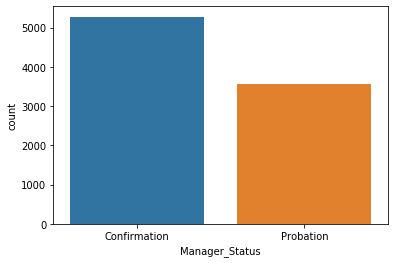

In [25]:
print(df['Manager_Status'].value_counts())
sns.countplot(df['Manager_Status'])

0    5813
1    3031
Name: Business_Sourced, dtype: int64


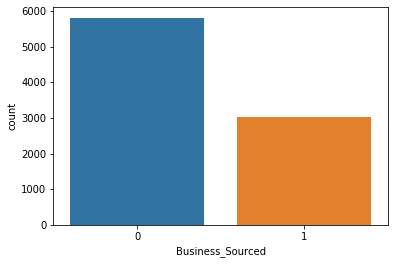

In [26]:
sns.countplot(df['Business_Sourced'])
print(df['Business_Sourced'].value_counts())

#### Applicant Qualification vs Business Sourced

In [27]:
Applicant_Qualification_BS = df.groupby('Applicant_Qualification').Business_Sourced.value_counts()
Applicant_Qualification_BS

Applicant_Qualification                                           Business_Sourced
Associate / Fellow of Institute of Chartered Accountans of India  0                      2
                                                                  1                      1
Associate/Fellow of Acturial Society of India                     0                      1
Associate/Fellow of Institute of Company Secretories of India     0                      1
Associate/Fellow of Insurance Institute of India                  1                      1
Class X                                                           0                    147
                                                                  1                     53
Class XII                                                         0                   3665
                                                                  1                   1784
Graduate                                                          0                   1893
       

<Figure size 1440x720 with 0 Axes>

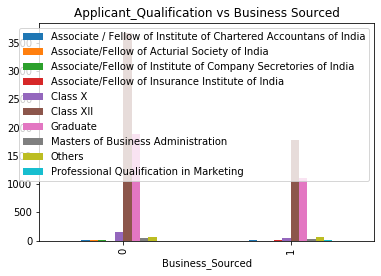

In [28]:
plt.figure(figsize = (20,10))
Applicant_Qualification_BS.unstack(level=0).plot(kind='bar',subplots=False)
plt.title('Applicant_Qualification vs Business Sourced')
plt.legend(loc='best')
plt.show()

#### Applicant Gender vs Business Sourced

In [29]:
df['Applicant_Gender'].value_counts()

M    6693
F    2151
Name: Applicant_Gender, dtype: int64

In [30]:
Applicant_Gender_BS = df.groupby('Applicant_Gender').Business_Sourced.value_counts()
Applicant_Gender_BS

Applicant_Gender  Business_Sourced
F                 0                   1329
                  1                    822
M                 0                   4484
                  1                   2209
Name: Business_Sourced, dtype: int64

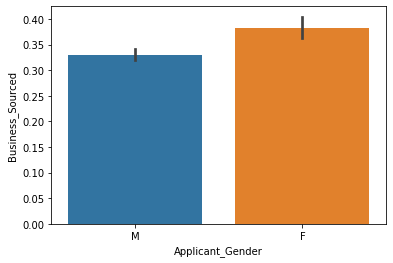

In [31]:
sns.barplot('Applicant_Gender','Business_Sourced', data=df)


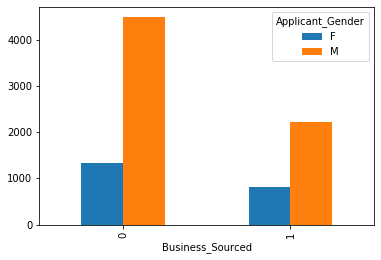

In [32]:
Applicant_Gender_BS.unstack(level=0).plot(kind='bar',subplots=False)


#### Manager Gender vs Business Sourced

In [33]:
df['Manager_Gender'].value_counts()

M    7627
F    1217
Name: Manager_Gender, dtype: int64

In [34]:
Manager_Gender_BS = df.groupby('Manager_Gender').Business_Sourced.value_counts()
Manager_Gender_BS

Manager_Gender  Business_Sourced
F               0                    750
                1                    467
M               0                   5063
                1                   2564
Name: Business_Sourced, dtype: int64

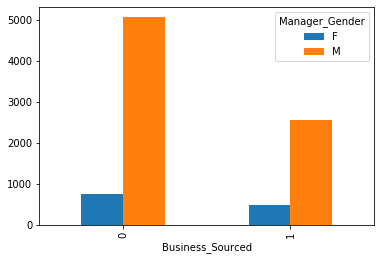

In [35]:
Manager_Gender_BS.unstack(level=0).plot(kind='bar', subplots=False)

#### Applicant Marital Status vs Business Survived

In [36]:
df['Applicant_Marital_Status'].value_counts()

M    5778
S    3056
W       6
D       4
Name: Applicant_Marital_Status, dtype: int64

In [37]:
Applicant_Marital_Status_BS = df.groupby('Applicant_Marital_Status').Business_Sourced.value_counts()
Applicant_Marital_Status_BS

Applicant_Marital_Status  Business_Sourced
D                         0                      2
                          1                      2
M                         0                   3794
                          1                   1984
S                         0                   2014
                          1                   1042
W                         0                      3
                          1                      3
Name: Business_Sourced, dtype: int64

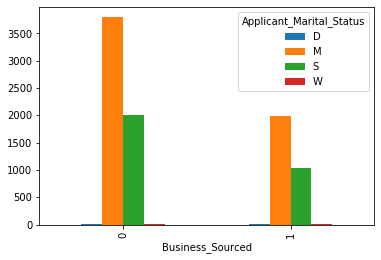

In [38]:
Applicant_Marital_Status_BS.unstack(level=0).plot(kind='bar',subplots=False)


#### Applicant Occupation vs Business Sourced

In [39]:
df['Applicant_Occupation'].value_counts()

Salaried         3546
Business         2157
Others           1809
Self Employed     146
Student            96
Name: Applicant_Occupation, dtype: int64

In [40]:
Applicant_Occupation_BS = df.groupby('Applicant_Occupation').Business_Sourced.value_counts()
Applicant_Occupation_BS

Applicant_Occupation  Business_Sourced
Business              0                   1440
                      1                    717
Others                0                   1134
                      1                    675
Salaried              0                   2296
                      1                   1250
Self Employed         0                    146
Student               0                     50
                      1                     46
Name: Business_Sourced, dtype: int64

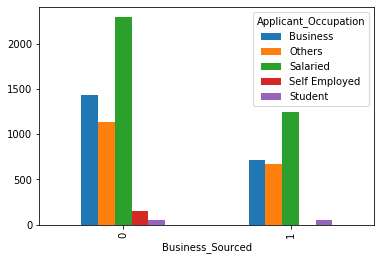

In [41]:
Applicant_Occupation_BS.unstack(level=0).plot(kind='bar', subplots=False)

####  Age vs Business Sourced

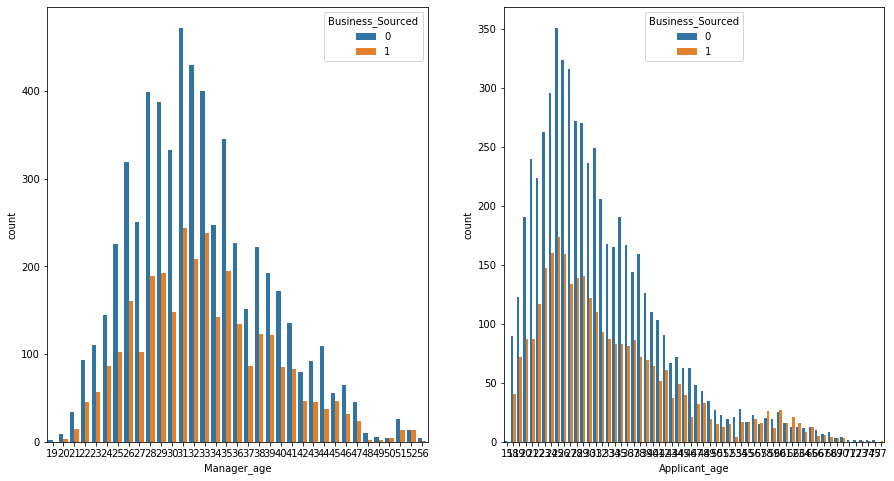

In [42]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.countplot(df['Manager_age'], hue=df['Business_Sourced'], ax = ax1)
sns.countplot(df['Applicant_age'], hue=df['Business_Sourced'], ax = ax2)

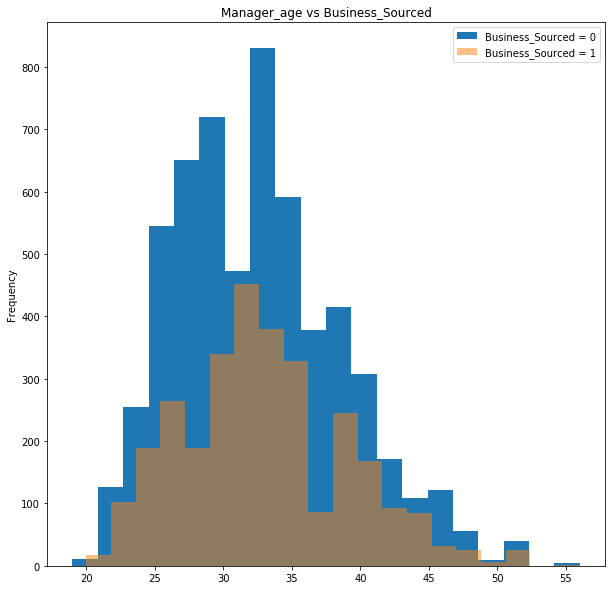

In [43]:
plt.figure(figsize=(10,10))
df['Manager_age'][df['Business_Sourced']==0].plot.hist(bins=20, alpha=1, label='Business_Sourced = 0')
df['Manager_age'][df['Business_Sourced']==1].plot.hist(bins=20, alpha=0.5, label='Business_Sourced = 1')
plt.title('Manager_age vs Business_Sourced')
plt.legend(loc='best')

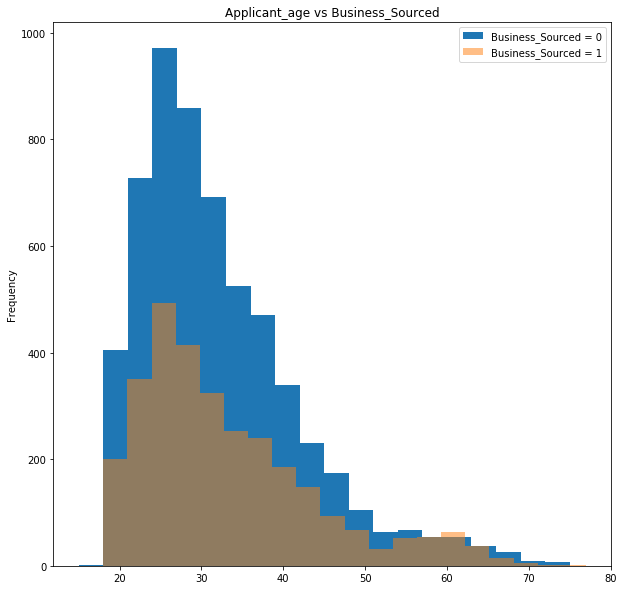

In [44]:
plt.figure(figsize=(10,10))
df['Applicant_age'][df['Business_Sourced']==0].plot.hist(bins=20, alpha=1, label='Business_Sourced = 0')
df['Applicant_age'][df['Business_Sourced']==1].plot.hist(bins=20, alpha=0.5, label='Business_Sourced = 1')
plt.title('Applicant_age vs Business_Sourced')
plt.legend(loc='best')

#### Handling Nominal Data

In [101]:
categorical_feature = df[['Applicant_Gender', 'Applicant_Marital_Status', 'Manager_Status', 'Manager_Gender']]
dummied = pd.get_dummies(categorical_feature, drop_first=True)
df = pd.concat([df, dummied], axis=1)

del df['Applicant_Gender']
del df['Applicant_Marital_Status']
del df['Manager_Status']
del df['Manager_Gender']

#### Handling Ordinal Data

In [102]:
print("\nUnique values in Applicant_Qualification:\n", df['Applicant_Qualification'].unique())
print("\nUnique values in Manager_Current_Designation:\n", df['Manager_Current_Designation'].unique())
print("\nUnique values in Manager_Joining_Designation:\n", df['Manager_Joining_Designation'].unique())


Unique values in Applicant_Qualification:
 ['Graduate' 'Class XII' 'Class X' 'Masters of Business Administration'
 'Associate/Fellow of Institute of Company Secretories of India'
 'Associate / Fellow of Institute of Chartered Accountans of India'
 'Others' 'Associate/Fellow of Insurance Institute of India'
 'Associate/Fellow of Acturial Society of India'
 'Professional Qualification in Marketing']

Unique values in Manager_Current_Designation:
 ['Level 2' 'Level 1' 'Level 3' 'Level 4' 'Level 5']

Unique values in Manager_Joining_Designation:
 ['Level 1' 'Level 2' 'Other' 'Level 3' 'Level 7' 'Level 5' 'Level 4'
 'Level 6']


Class XII                                                           5449
Graduate                                                            3000
Class X                                                              200
Others                                                               117
Masters of Business Administration                                    71
Associate / Fellow of Institute of Chartered Accountans of India       3
Professional Qualification in Marketing                                1
Associate/Fellow of Insurance Institute of India                       1
Associate/Fellow of Acturial Society of India                          1
Associate/Fellow of Institute of Company Secretories of India          1
Name: Applicant_Qualification, dtype: int64


Text(0.5, 1.0, 'Applicant_Qualification Vs Business_Sourced')

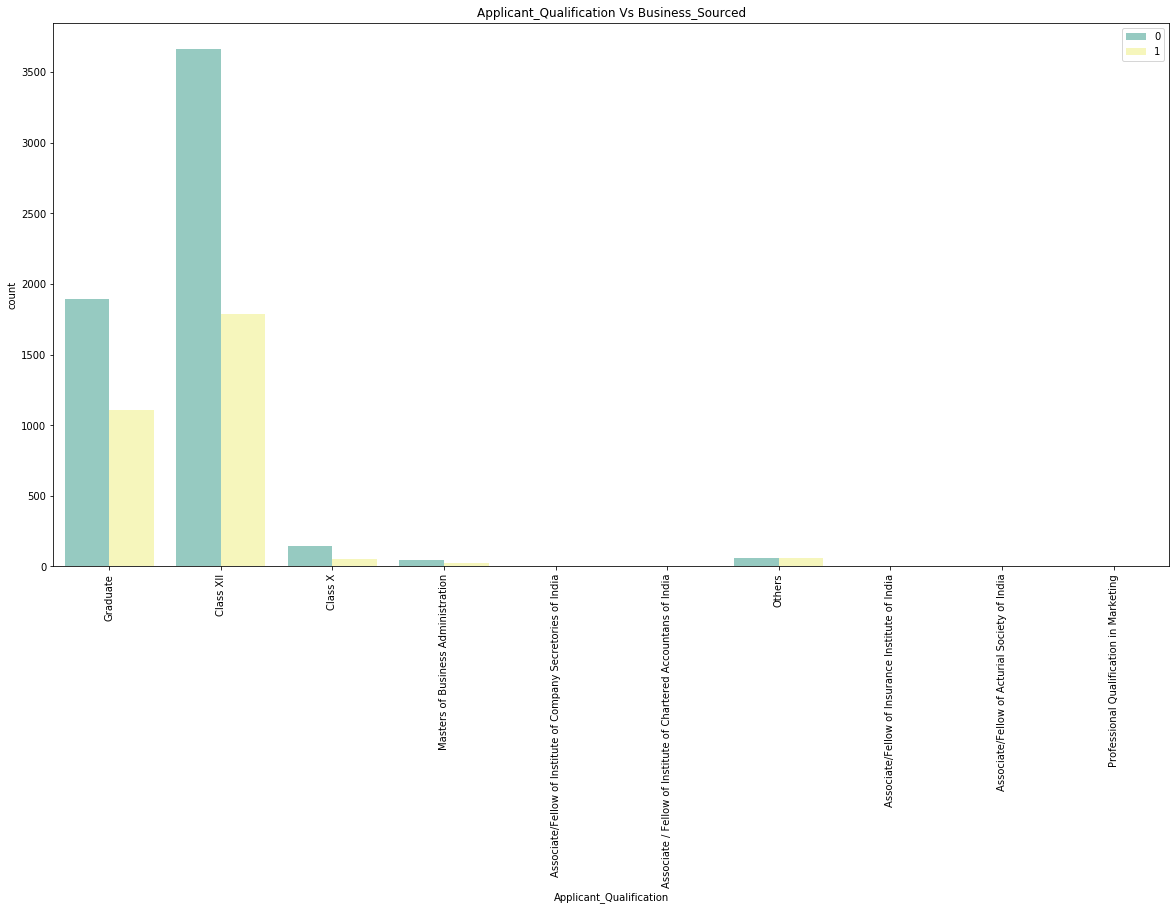

In [103]:
df.replace({'Level 1': 1, 'Level 2': 2, 'Level 3': 3, 'Level 4': 4, 'Level 5': 5, 'Level 6': 6, 'Level 7': 7 }, inplace = True)
print(df['Applicant_Qualification'].value_counts())
plt.figure(figsize= [20,10])
sns.countplot(df['Applicant_Qualification'], hue = df['Business_Sourced'], palette='Set3')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title("Applicant_Qualification Vs Business_Sourced")

In [104]:
df.replace({'Other': 0, 'Others':0, 'Class X': 1, 'Class XII': 2, 'Graduate': 3, 'Masters of Business Administration': 4,
                'Associate / Fellow of Institute of Chartered Accountans of India': 5,
                'Professional Qualification in Marketing': -1,
                'Associate/Fellow of Insurance Institute of India': -1,
                'Associate/Fellow of Institute of Company Secretories of India': -1,
                'Associate/Fellow of Acturial Society of India': -1}, inplace = True)
print("\nUnique values in Applicant_Occupation:\n", df['Applicant_Occupation'].unique())
df.head()


Unique values in Applicant_Occupation:
 [0 'Business' 'Salaried' 'Self Employed' 'Student' nan]


,Applicant_Occupation,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Applicant_age,Manager_age,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,Manager_Status_Probation,Manager_Gender_M
0,0,3,1,2,3.0,2.0,1.0,335249.0,28.0,335249.0,28.0,0,35,27,1,1,0,0,0,1
1,0,2,1,2,3.0,2.0,1.0,335249.0,28.0,335249.0,28.0,1,24,27,1,0,1,0,0,1
2,Business,2,1,1,2.0,0.0,0.0,357184.0,24.0,357184.0,24.0,0,41,37,1,1,0,0,0,1
3,Salaried,2,1,3,4.0,0.0,0.0,318356.0,22.0,318356.0,22.0,0,19,25,1,0,1,0,0,0
4,0,2,1,1,2.0,2.0,1.0,230402.0,17.0,230402.0,17.0,0,21,35,1,1,0,0,0,1


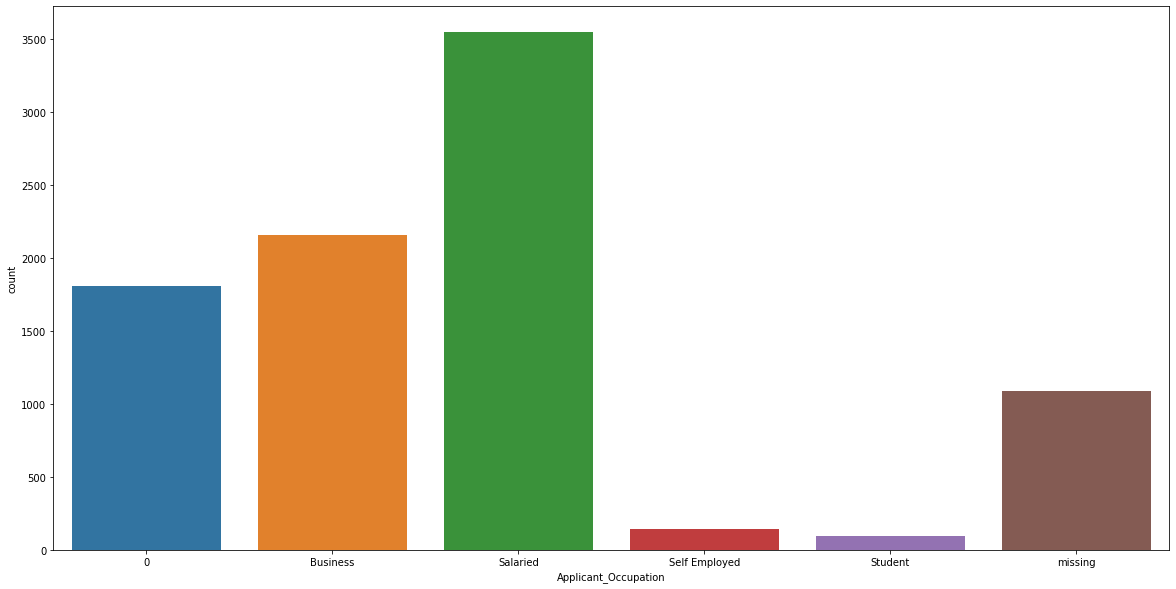

In [105]:
df.fillna('missing', inplace = True)
plt.figure(figsize= [20,10])
df['Applicant_Occupation'] = df['Applicant_Occupation'].astype('category')
sns.countplot(df['Applicant_Occupation'])

From above information about Applicant_Occupation its evident that 1090 entries are missing. Applying EXTRATREE REGRESSOR MODEL to predict those missing value to avoid biase

In [106]:
df.replace({0: 0, 'Business': 1, 'Salaried': 2, 'Self Employed': 3, 'Student': 4}, inplace = True)
df['Applicant_Occupation'].unique()

array([0, 1, 2, 3, 4, 'missing'], dtype=object)

In [107]:
occupation_train = df[df['Applicant_Occupation'] != 'missing']
occupation_test = df[df['Applicant_Occupation'] == 'missing']
print('train occupation shape', occupation_train.shape)
print('test occupation shape', occupation_test.shape)
xo_train = occupation_train.drop(['Applicant_Occupation'], axis=1)
yo_train = occupation_train['Applicant_Occupation']
xo_test = occupation_test.drop(['Applicant_Occupation'], axis=1)
yo_train = yo_train.astype('int')

train occupation shape (7754, 20)
test occupation shape (1090, 20)


In [108]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(xo_train, yo_train)
occupation_test['Applicant_Occupation'] = model.predict(xo_test)

In [109]:
df = pd.concat([occupation_train, occupation_test])
df.shape

(8844, 20)

In [54]:
df['Applicant_Occupation'].unique()

array([0, 1, 2, 3, 4], dtype=object)

In [110]:
df['Applicant_Occupation'] = df['Applicant_Occupation'].astype('int')
df['Applicant_Occupation']= df['Applicant_Occupation'].apply({0: 'others', 1: 'Business', 2: 'Salaried', 3: 'Self Employed', 4: 'Student'}.get)
df.dtypes

Applicant_Occupation            object
Applicant_Qualification          int64
Manager_Joining_Designation      int64
Manager_Current_Designation      int64
Manager_Grade                  float64
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
Applicant_age                    int64
Manager_age                      int64
Applicant_Gender_M               int64
Applicant_Marital_Status_M       int64
Applicant_Marital_Status_S       int64
Applicant_Marital_Status_W       int64
Manager_Status_Probation         int64
Manager_Gender_M                 int64
dtype: object

Null values present in each row:
 Applicant_Occupation           0
Applicant_Qualification        0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
Applicant_age                  0
Manager_age                    0
Applicant_Gender_M             0
Applicant_Marital_Status_M     0
Applicant_Marital_Status_S     0
Applicant_Marital_Status_W     0
Manager_Status_Probation       0
Manager_Gender_M               0
dtype: int64


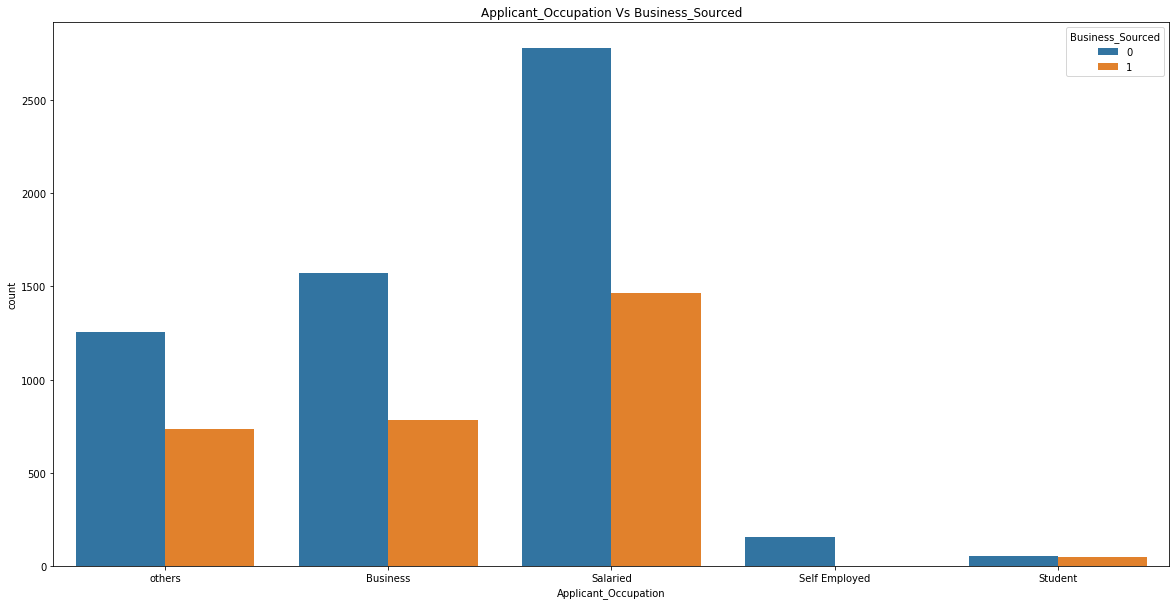

In [111]:
print("Null values present in each row:\n",df.isnull().sum())
plt.figure(figsize= [20,10])
plt.title("Applicant_Occupation Vs Business_Sourced")
sns.countplot(df['Applicant_Occupation'], hue= df['Business_Sourced'])

In [112]:
dummy = pd.get_dummies(df['Applicant_Occupation'], drop_first=True)
df = pd.concat([df,dummy], axis=1)
del df['Applicant_Occupation']

In [58]:
df.head()

,Applicant_Qualification,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Applicant_age,Manager_age,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,Manager_Status_Probation,Manager_Gender_M,Salaried,Self Employed,Student,others
0,3,1,2,3.0,2.0,1.0,335249.0,28.0,335249.0,28.0,0,35,27,1,1,0,0,0,1,0,0,0,1
1,2,1,2,3.0,2.0,1.0,335249.0,28.0,335249.0,28.0,1,24,27,1,0,1,0,0,1,0,0,0,1
2,2,1,1,2.0,0.0,0.0,357184.0,24.0,357184.0,24.0,0,41,37,1,1,0,0,0,1,0,0,0,0
3,2,1,3,4.0,0.0,0.0,318356.0,22.0,318356.0,22.0,0,19,25,1,0,1,0,0,0,1,0,0,0
4,2,1,1,2.0,2.0,1.0,230402.0,17.0,230402.0,17.0,0,21,35,1,1,0,0,0,1,0,0,0,1


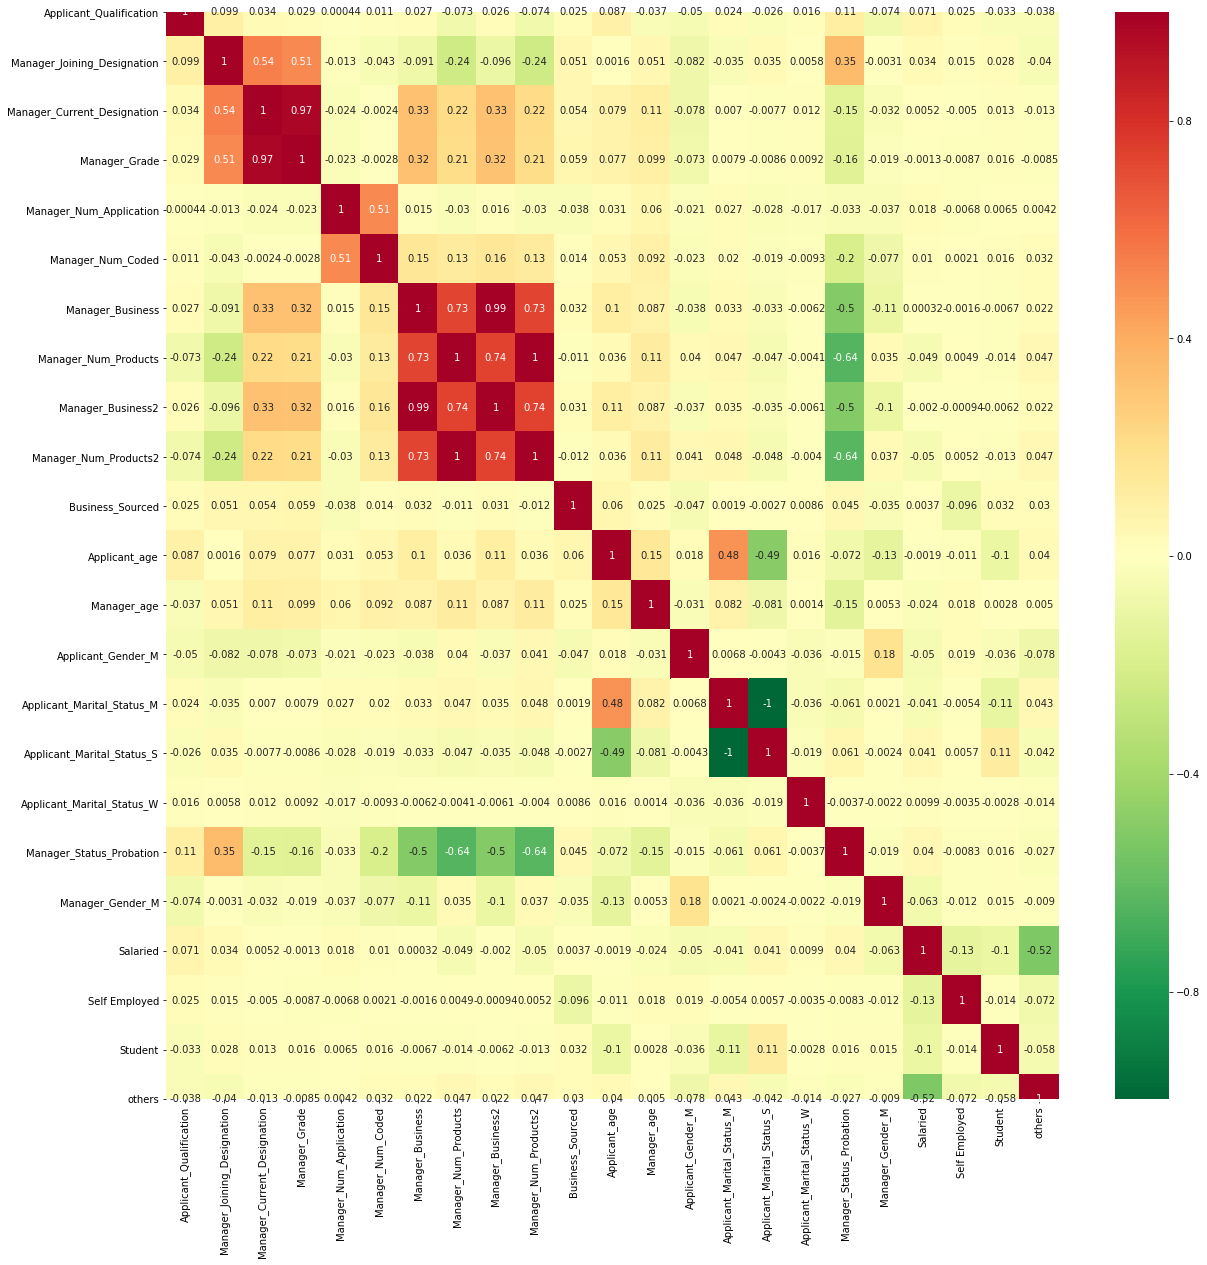

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn_r')
plt.show()

Manager_Business and Manager_Business2 showing high collinearity. similarly, Manager_Current_Designation and Manager Grade is showing High collinearity.

In [113]:
# deleting the two rows to remove collinearity

del df['Manager_Business2']
del df['Manager_Current_Designation']

In [114]:
X = df.drop(['Business_Sourced'], axis=1)
y = df.Business_Sourced
print(X.shape)
print(y.shape)

(8844, 20)
(8844,)


#### Feature Extraction

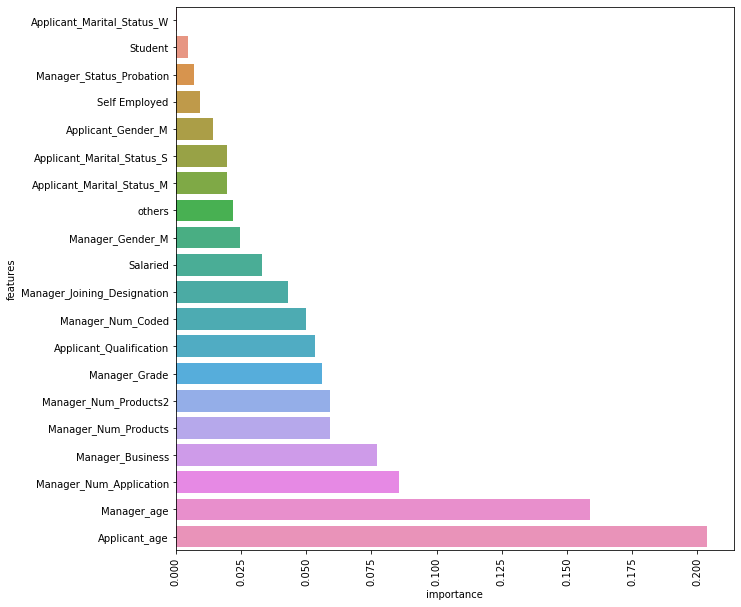

In [62]:
etr = ExtraTreesRegressor()
etr.fit(X,y)
feature = {'features':X.columns, 'importance': etr.feature_importances_}
feature_select = pd.DataFrame(feature)
feature_select = feature_select.sort_values(by='importance')
plt.figure(figsize=(10,10))
sns.barplot(x='importance', y='features',data=feature_select)
plt.xticks(rotation=90)
plt.show()

In [63]:
print(feature_select)

                       features  importance
13   Applicant_Marital_Status_W    0.000378
18                      Student    0.004640
14     Manager_Status_Probation    0.007045
17                Self Employed    0.009309
10           Applicant_Gender_M    0.014192
12   Applicant_Marital_Status_S    0.019522
11   Applicant_Marital_Status_M    0.019760
19                       others    0.021857
15             Manager_Gender_M    0.024577
16                     Salaried    0.032976
1   Manager_Joining_Designation    0.042911
4             Manager_Num_Coded    0.049852
0       Applicant_Qualification    0.053505
2                 Manager_Grade    0.055873
7         Manager_Num_Products2    0.059226
6          Manager_Num_Products    0.059235
5              Manager_Business    0.077099
3       Manager_Num_Application    0.085504
9                   Manager_age    0.158759
8                 Applicant_age    0.203782


In [64]:
#columns = list(feature_select['features']feature_select['importance']>0.01)
#print('Important features for prediction are:\n', columns)
# X=df[columns]

In [136]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, random_state=12)

In [146]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=11)

In [132]:
'''from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
xtrain = pca.fit_transform(xtrain)
xtest = pca.transform(xtest)'''

In [147]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Building pipeline and model

In [ ]:
'''pipe_lg = Pipeline([('s1',StandardScaler()),('lg',LogisticRegression())])
pipe_svc = Pipeline([('s2',StandardScaler()),('svc',SVC())])
pipe_linear_svc = Pipeline([('s3',StandardScaler()),('linear_svc',LinearSVC())])
pipe_sgd = Pipeline([('s4',StandardScaler()),('SGD',SGDClassifier(max_iter=5, tol=None))])
pipe_NB = Pipeline([('s5',StandardScaler()),('NB',GaussianNB())])
pipe_DT = Pipeline([('s6',StandardScaler()),('DT',DecisionTreeClassifier())])
pipe_perceptron = Pipeline([('s7',StandardScaler()),('Perceptron',Perceptron(max_iter=5,tol=None))])
#pipe_rf = Pipeline(['RF',RandomForestClassifier(n_estimators = 100)])
#pipe_abc = Pipeline(['abc',AdaBoostClassifier()])
#pipe_xgb = Pipeline(['xgb',XGBClassifier()])
#pipe_gbm = Pipeline(['GBM',GradientBoostingClassifier()])

pipelines = [pipe_lg,pipe_svc,pipe_linear_svc,pipe_sgd,pipe_NB,pipe_DT,
             pipe_perceptron]
models = ['LG','SVC','Linear SVC','SGD','Naive Bayes','DT','Perceptron']

for pipe in pipelines:
    pipe.fit(xtrain,ytrain)
    
for i,model in enumerate(pipelines):
    print("{} model score = {}".format(models[i],accuracy_score(ytest,pipe.predict(xtest))))'''

#### Logistic Regression

In [83]:
'''estimators = []
estimators.append(('sc1',StandardScaler()))
estimators.append(('LG',LogisticRegression()))
model = Pipeline(estimators)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
'''

Mean Accuracy: 0.659 (0.005)


plotting the distributions of predicted probability values for Business Sourced as 0 and 1

In [ ]:
estimators = []
estimators.append(('sc1',StandardScaler()))
estimators.append(('LG',LogisticRegression()))
model = Pipeline(estimators)

model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [ ]:
'''from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(xtrain, ytrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

In [72]:
lg = LogisticRegression(penalty='l2',C=0.01, solver='newton-cg',class_weight='balanced')
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [85]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(lg, xtrain, ytrain, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Mean Accuracy: 0.551 (0.016)


In [73]:
print(accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

0.5550113036925396
              precision    recall  f1-score   support

           0       0.71      0.54      0.61      1735
           1       0.40      0.58      0.48       919

    accuracy                           0.56      2654
   macro avg       0.56      0.56      0.54      2654
weighted avg       0.60      0.56      0.57      2654



In [74]:
print(confusion_matrix(ytest,ypred))

[[937 798]
 [383 536]]


#### ROC_AUC curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.584


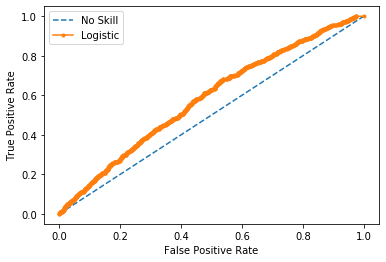

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(ytest))]

# predict probabilities
lr_probs = lg.predict_proba(xtest)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [ ]:
'''fpr, tpr, thresholds = roc_curve(ytrain,ypred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

plot_roc_curve(fpr,tpr)
'''

In [148]:
import statsmodels.api as sm

logit = sm.Logit(y_train,x_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.678578
         Iterations 6


In [149]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: -0.052   
Dependent Variable: Business_Sourced AIC:              8440.7904
Date:               2020-09-08 07:32 BIC:              8575.4043
No. Observations:   6190             Log-Likelihood:   -4200.4  
Df Model:           19               LL-Null:          -3992.3  
Df Residuals:       6170             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
x1        0.0190     0.0264    0.7200   0.4715   -0.0328    0.0709
x2        0.0069     0.0358    0.1925   0.8474   -0.0633    0.0771
x3        0.0809     0.0350    2.3140   0.0207    0.0124    0.1494
x4       -0.1102     0.0304   -3.6279   0.0003   -0.1697   -0.0507
x5        0.0866     0.0312    2.7769   0.0055    0.0255    0.1477
x6        0.1009     0.0414    2.4357   0.0149    0.0197    0.1820
x7        0.2177     0.5711    0.3813   0.7030   -0.9016    1.3371
x8       -0.2527     0.5673   -0.4455   0.6560   -1.3645    0.8591
x9        0.1555     0.0308    5.0534   0.0000    0.0952    0.2158
x10       0.0717     0.0266    2.6935   0.0071    0.0195    0.1239
x11      -0.0567     0.0268   -2.1165   0.0343   -0.1091   -0.0042
x12      -0.1025     0.5526   -0.1855   0.8529   -1.1857    0.9807
x13      -0.0367     0.5527   -0.0663   0.9471   -1.1200    1.0467
x14       0.0516     0.0525    0.9825   0.3259   -0.0513    0.1544
x15       0.1406     0.0367    3.8289   0.0001    0.0686    0.2125
x16      -0.0207     0.0272   -0.7625   0.4457   -0.0740    0.0326
x17       0.0257     0.0314    0.8184   0.4131   -0.0358    0.0872
x18      -0.2175     0.0355   -6.1291   0.0000   -0.2871   -0.1480
x19       0.0667     0.0272    2.4542   0.0141    0.0134    0.1199
x20       0.0779     0.0311    2.5019   0.0124    0.0169    0.1389
================================================================

"""

In [162]:
y_pred = logit_model.predict(x_test)

In [163]:
prediction = list(map(round,y_pred))

In [165]:
# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[920 845]
 [357 532]]
Test accuracy =  0.5470987189148455


In [166]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.72      0.52      0.60      1765
           1       0.39      0.60      0.47       889

    accuracy                           0.55      2654
   macro avg       0.55      0.56      0.54      2654
weighted avg       0.61      0.55      0.56      2654



In [170]:
y_pred_df = pd.DataFrame({'actual': y_test, 'pred_prob': prediction})

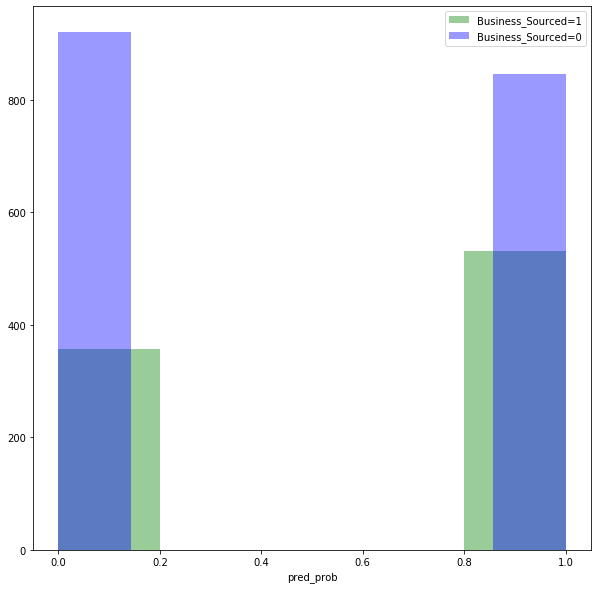

In [172]:
plt.figure(figsize = (10,10))
# for Business_sourced = 1
sns.distplot(y_pred_df[y_test==1]['pred_prob'], kde=False, color='g', label='Business_Sourced=1')
# for Business_sourced = 0
sns.distplot(y_pred_df[y_test==0]['pred_prob'], kde=False, color='b', label='Business_Sourced=0')
plt.legend(loc='best')

0.5598358278869532


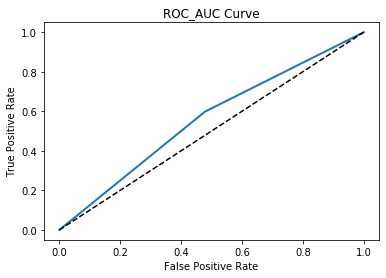

In [176]:
fpr, tpr, thresholds = roc_curve(y_test,prediction)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC_AUC Curve')

plot_roc_curve(fpr,tpr,'Logistic Regression')
print (roc_auc_score(y_test,prediction))

#### SVC

In [77]:
estimators = []
estimators.append(('sc2',StandardScaler()))
estimators.append(('svc',SVC()))
model = Pipeline(estimators)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


Mean Accuracy: 0.658 (0.002)


In [ ]:
'''svc = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(xtrain, ytrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

#### Linear SVC

In [ ]:
estimators = []
estimators.append(('sc3',StandardScaler()))
estimators.append(('Linear SVC',LinearSVC()))
model = Pipeline(estimators)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


#### Regularized linear model with SGD

In [ ]:
estimators = []
estimators.append(('sc4',StandardScaler()))
estimators.append(('SGD',SGDClassifier()))
model = Pipeline(estimators)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


#### Naive Bayes

In [ ]:
estimators = []
estimators.append(('sc5',StandardScaler()))
estimators.append(('NB',GaussianNB()))
model = Pipeline(estimators)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


#### Perceptron

In [ ]:
estimators = []
estimators.append(('sc',StandardScaler()))
estimators.append(('Perceptron',Perceptron()))
model = Pipeline(estimators)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


#### Decision Tree

In [ ]:
estimators = []
estimators.append(('sc6',StandardScaler()))
estimators.append(('DT',DecisionTreeClassifier()))
model = Pipeline(estimators)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


#### Random Forest

In [116]:
rf = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


Mean Accuracy: 0.652 (0.012)


In [134]:
rf.fit(xtrain,ytrain)
rf_pred = rf.predict(xtest)
print(accuracy_score(ytest,rf_pred))
print(confusion_matrix(ytest,rf_pred))

0.6039939713639789
[[1402  333]
 [ 718  201]]


In [137]:
from sklearn.model_selection import cross_val_predict
rfc = RandomForestClassifier()
y_prob = cross_val_predict(rfc, xtrain, ytrain, cv=3, method = 'predict_proba')


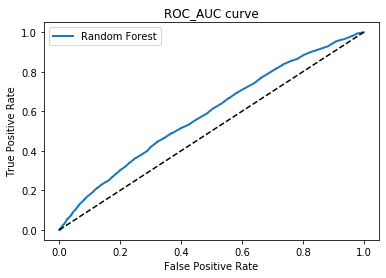

In [145]:
# roc-auc for Random Forest
y_score = y_prob[:,1]
fpr, tpr, threshold = roc_curve(ytrain,y_score)
plot_roc_curve(fpr, tpr, 'Random Forest')
plt.legend(loc='best')
plt.show()

#### AdaBoost

In [ ]:
model = AdaBoostClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


#### XGBoost

In [ ]:
model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


#### Gradient Boosting

In [ ]:
model = GradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


In [ ]:
gbm = GradientBoostingClassifier()
gbm.fit(xtrain,ytrain)
gbm_pred = gbm.predict(xtest)

print(accuracy_score(ytest,gbm_pred))
print(classification_report(ytest,gbm_pred))
print(confusion_matrix(ytest,gbm_pred))

In [ ]:
'''# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(xtrain, ytrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

#### Bagged DT

In [ ]:
from sklearn.ensemble import BaggingClassifier

# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(xtrain, ytrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))